# The `xarray.Dataset` strucuture for AITA

[`xarrayaita`](https://github.com/ThomasChauve/xarray_aita) is a dataset accessor for [`xarray`](http://xarray.pydata.org/en/stable/). In this section we explain what is minimal contruction that you need to build and what are the function that you can applied through this `xarrayaita`

## The minimal structure of `xarrayaita`

In [4]:
import xarrayaita.loadData_aita as lda #here are some function to build xarrayaita structure
import xarrayaita.aita as xa

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import xarray as xr

Load data to show an exemple.

In [8]:
# path to data and microstructure
path_data='orientation_test.dat'
path_micro='micro_test.bmp'

In this case we use a constructor function that take as input :
1. a `.dat` file that is a output from [G50 fabric analyser](http://www.russellheadinstruments.com/files/G50%20brochure%2009Jan08%20rev1.pdf). If you have an over analyser it should be easy to implement an other constructor function.
2. a `.bmp` that is the microstructure image if it as been processing elsewhere (grains boundaries are the white pixel). This input can be leave empty

In [9]:
help(lda.aita5col)

Help on function aita5col in module xarrayaita.loadData_aita:

aita5col(adr_data, micro_adress=0)



In [10]:
data=lda.aita5col(path_data,path_micro)

### xarray.Dataset

The data strucutre is a regular `xarray.Dataset`. Therefore it can be use as one. 

Specific function can be applied to it :

`data.xa.FUNCTION`

You can visualised what is store in your `xarray.Dataset` using :

In [11]:
data

<xarray.Dataset>
Dimensions:      (v: 2, x: 1000, y: 2500)
Coordinates:
  * x            (x) float64 0.0 0.02 0.04 0.06 0.08 ... 19.92 19.94 19.96 19.98
  * y            (y) float64 0.0 0.02 0.04 0.06 0.08 ... 49.92 49.94 49.96 49.98
Dimensions without coordinates: v
Data variables:
    orientation  (y, x, v) float64 2.395 0.6451 5.377 ... 0.6395 0.6098 0.6473
    quality      (y, x) int64 0 90 92 93 92 92 94 94 ... 96 96 96 96 96 97 97 96
    micro        (y, x) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    grainId      (y, x) int64 1 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1 1

There is 4 `xarray.DataArray` variables :
1. `orientation` : that store the orientation of each pixel. It is store as azimuth and colatitude. (see figure below) It is meant to be use with [xarrayuvecs](https://github.com/ThomasChauve/xarray_uvecs) `DataArray`.
2. `quality` : that is the quality factor given by the analyser (between $[0,100]$).
3. `micro` : it is the microstrucure image given as input.
4. `grainId` : it is a labelling of the microstrucure where each pixel within the same grain as a unique label.

This is the minimal structure to use `xarrayaita` function.

## Visualisation of the variable
Therefore every `Data variable` can be plot using regular xarray ploting function

### Orientation variable
The data are store as azimuth and colatitude

Text(0.5, 1.0, 'colatitude')

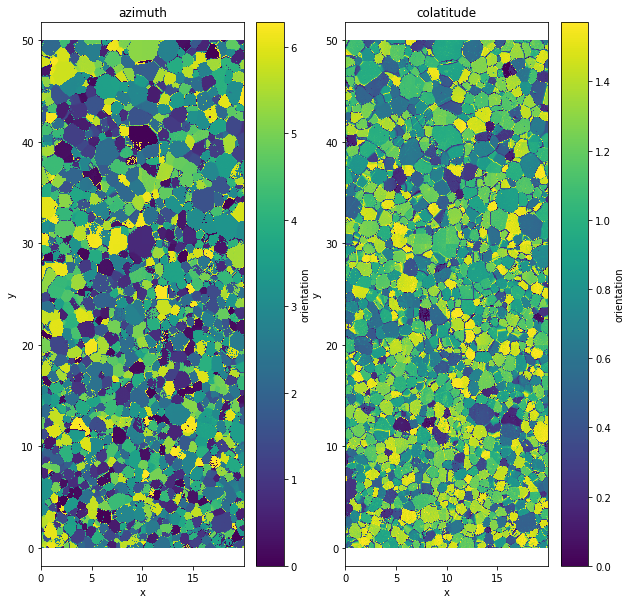

In [12]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
data.orientation[:,:,0].plot()
plt.axis('equal')
plt.title('azimuth')
plt.subplot(1,2,2)
data.orientation[:,:,1].plot()
plt.axis('equal')
plt.title('colatitude')

### Quality variable

Text(0.5, 1.0, 'quality')

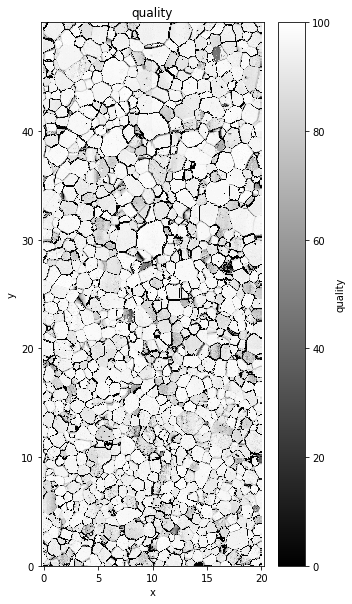

In [13]:
plt.figure(figsize=(5,10))
data.quality.plot(cmap=cm.gray)
plt.axis('equal')
plt.title('quality')

### GrainID variable

Text(0.5, 1.0, 'grainId')

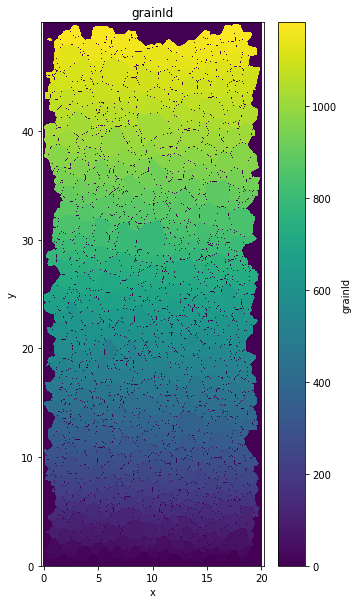

In [8]:
plt.figure(figsize=(5,10))
data.grainId.plot()
plt.axis('equal')
plt.title('grainId')

If you prefere to look at Bunge Euler angle you can extract them using uvecs

All the variable are visible in your `xarray.Dataset`

## The function within `xarrayaita`

### `xa.filter`
It only affect the orientation value. Where the `data.quality` variable is bellow the given value `val` the orienation value is replace by a `nan`. 

In [20]:
help(xa.aita.filter)

Help on function filter in module xarrayaita.aita:

filter(self, val)
    Put nan value in orientation file



In [21]:
data.aita.filter(75)

Text(0.5, 1.0, 'colatitude')

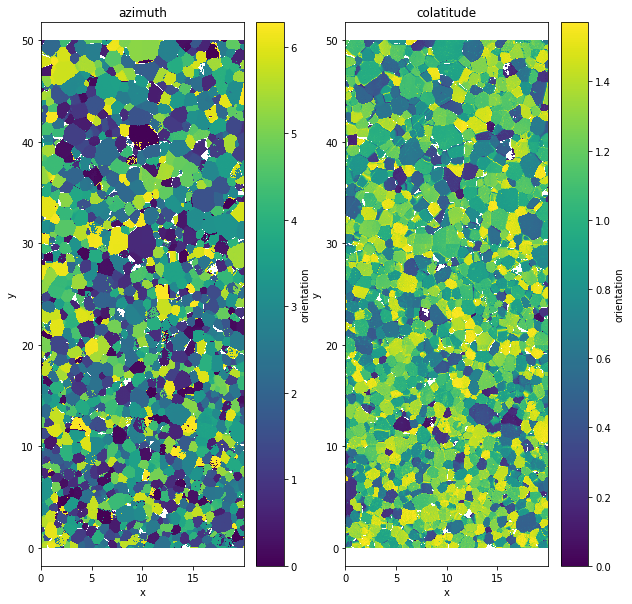

In [22]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
data.orientation[:,:,0].plot()
plt.axis('equal')
plt.title('azimuth')
plt.subplot(1,2,2)
data.orientation[:,:,1].plot()
plt.axis('equal')
plt.title('colatitude')

## Symmetry transformation

### `fliplr`
Flip the data with a horizontal mirror.

In [23]:
help(xa.aita.fliplr)

Help on function filter in module xarrayaita.aita:

filter(self, val)
    Put nan value in orientation file



### `rot180`

In [26]:
help(xa.aita.rot180)

Help on function rot180 in module xarrayaita.aita:

rot180(self)
    rotate 180 degre the data and rotate the orientation



### `flipup`
Flip the data with a vertical mirror.

In [25]:
help(xa.aita.flipud)

Help on function flipud in module xarrayaita.aita:

flipud(self)
    flip up down the data and rotate the orientation

